In [1]:
pip install ucimlrepo


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score  # Import accuracy metric

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
letter_recognition = fetch_ucirepo(id=59) 
  
# data (as pandas dataframes) 
X = letter_recognition.data.features 
y = letter_recognition.data.targets 
  
# metadata 
print(letter_recognition.metadata) 
  
# variable information 
print(letter_recognition.variables) 


{'uci_id': 59, 'name': 'Letter Recognition', 'repository_url': 'https://archive.ics.uci.edu/dataset/59/letter+recognition', 'data_url': 'https://archive.ics.uci.edu/static/public/59/data.csv', 'abstract': 'Database of character image features; try to identify the letter', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 20000, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['lettr'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Thu Sep 28 2023', 'dataset_doi': '10.24432/C5ZP40', 'creators': ['David Slate'], 'intro_paper': None, 'additional_info': {'summary': 'The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts wa

In [4]:
customers_data=pd.concat([X, y], axis=1)
customers_data.head()


,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,lettr
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,T
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,I
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,D
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,N
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,G


In [5]:
customers_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x-box   20000 non-null  int64 
 1   y-box   20000 non-null  int64 
 2   width   20000 non-null  int64 
 3   high    20000 non-null  int64 
 4   onpix   20000 non-null  int64 
 5   x-bar   20000 non-null  int64 
 6   y-bar   20000 non-null  int64 
 7   x2bar   20000 non-null  int64 
 8   y2bar   20000 non-null  int64 
 9   xybar   20000 non-null  int64 
 10  x2ybr   20000 non-null  int64 
 11  xy2br   20000 non-null  int64 
 12  x-ege   20000 non-null  int64 
 13  xegvy   20000 non-null  int64 
 14  y-ege   20000 non-null  int64 
 15  yegvx   20000 non-null  int64 
 16  lettr   20000 non-null  object
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
customers_data.isna().sum()

x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
lettr    0
dtype: int64

In [7]:
customers_data.isin(['?']).sum()
customers_data.replace('?',np.NaN,inplace =True)

In [8]:
customers_data.isin([np.NaN]).sum()
customers_data.isnull().sum()
customers_data.dropna(how='any',inplace=True)

In [9]:
print(customers_data.duplicated().value_counts()) ##checking for duplicated data
print("----")
customers_data=customers_data.drop_duplicates() # dropping duplicated data
print(customers_data.duplicated().value_counts())

False    18668
True      1332
Name: count, dtype: int64
----
False    18668
Name: count, dtype: int64


In [10]:
random_seed=42
data_copy_sample=customers_data.copy() #Using all the data

In [11]:

def change_string_to_int(column):
    variables=pd.unique(customers_data[column])
    for item in range(variables.size):
        customers_data[column]=[item if each==variables[item] else each for each in customers_data[column]]
    return customers_data[column]

In [12]:
for column in data_copy_sample.columns:
    if data_copy_sample[column].dtype != 'int64' and data_copy_sample[column].dtype != 'float64':
        data_copy_sample[column] = change_string_to_int(column)

In [13]:
X=data_copy_sample.drop(columns=['lettr'],axis=1) #dropping class 
y=data_copy_sample['lettr']
X.head()


,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [15]:
#splitting the data into 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [16]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)  # Added DT
}


In [17]:
k_values = range(3, 21)
# Dictionary to store results
results = []

In [18]:
# Perform cross-validation for each K value
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Shuffle to reduce order bias

    for model_name, model in models.items():
        # Compute cross-validation scores
        model.fit(X_train, y_train)

        # Predict on test data
        y_pred = model.predict(X_test)

        # Compute test accuracy
        test_accuracy = accuracy_score(y_test, y_pred)

        # Compute variance using cross-validation on training data
        train_accuracies = cross_val_score(model, X_train, y_train, cv=kf)
        train_accuracy_mean = np.mean(train_accuracies)  # Training accuracy
        train_accuracy_variance = np.var(train_accuracies)  # Training accuracy variance


        # Compute bias using test set (1 - Accuracy)
        ##bias = 1 - accuracy

        bias = train_accuracy_mean - test_accuracy

        results.append({
            "Model": model_name,
            "K": k,
            "Training Accuracy": train_accuracy_mean,
            "Variance": train_accuracy_variance,
            "Test Accuracy": test_accuracy,
            "Bias": bias
        })

        


In [19]:
# Convert results into a DataFrame
import pandas as pd
df_results = pd.DataFrame(results)

# Save results to a CSV file
df_results.to_csv("bias_variance_results.csv", index=False)

# Display results without ace_tools
print(df_results.head())  # Print first 5 rows for verification

                    Model  K  Training Accuracy  Variance  Test Accuracy  \
0     Logistic Regression  3           0.754955  0.000031       0.761471   
1     K-Nearest Neighbors  3           0.916125  0.000005       0.941082   
2  Support Vector Machine  3           0.921328  0.000024       0.939832   
3           Decision Tree  3           0.821459  0.000002       0.854847   
4     Logistic Regression  4           0.757404  0.000049       0.761471   

       Bias  
0 -0.006516  
1 -0.024957  
2 -0.018504  
3 -0.033389  
4 -0.004067  


In [20]:
df_check = pd.read_csv("bias_variance_results.csv")
print(df_check.head())  # Print first few rows

                    Model  K  Training Accuracy  Variance  Test Accuracy  \
0     Logistic Regression  3           0.754955  0.000031       0.761471   
1     K-Nearest Neighbors  3           0.916125  0.000005       0.941082   
2  Support Vector Machine  3           0.921328  0.000024       0.939832   
3           Decision Tree  3           0.821459  0.000002       0.854847   
4     Logistic Regression  4           0.757404  0.000049       0.761471   

       Bias  
0 -0.006516  
1 -0.024957  
2 -0.018504  
3 -0.033389  
4 -0.004067  


In [21]:
# Function to plot Bias vs K and Variance vs K for each model
def plot_results(df, metric, ylabel, title_suffix):
    for model_name in df["Model"].unique():
        plt.figure(figsize=(8, 5))

        # Filter data for a specific model
        model_data = df[df["Model"] == model_name]
        x = model_data["K"].values
        y = model_data[metric].values

        # Scatter plot (Black markers)
        plt.scatter(x, y, color="black", label=f"{model_name} {ylabel}")

        # Fit and plot a straight trend line (Linear regression of degree 1)
        z = np.polyfit(x, y, 1)  # Linear trend line
        p = np.poly1d(z)
        plt.plot(x, p(x), color="black")  # Solid black trend line
        
        # Labels and title
        plt.xlabel("K Value")
        plt.ylabel(ylabel)
        plt.title(f"{ylabel} vs K Value ({model_name})")
        plt.legend()
        plt.grid(color='gray', linestyle='solid', linewidth=0.5)
        plt.show()

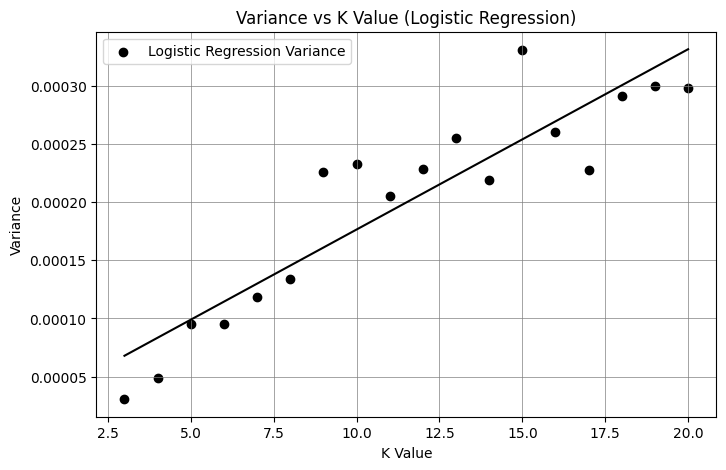

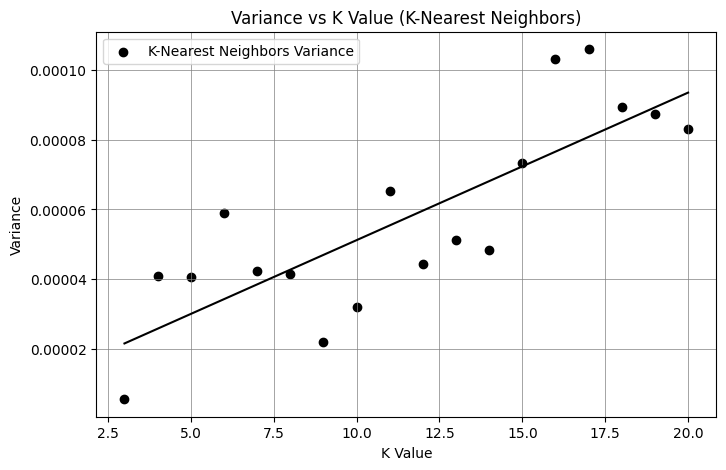

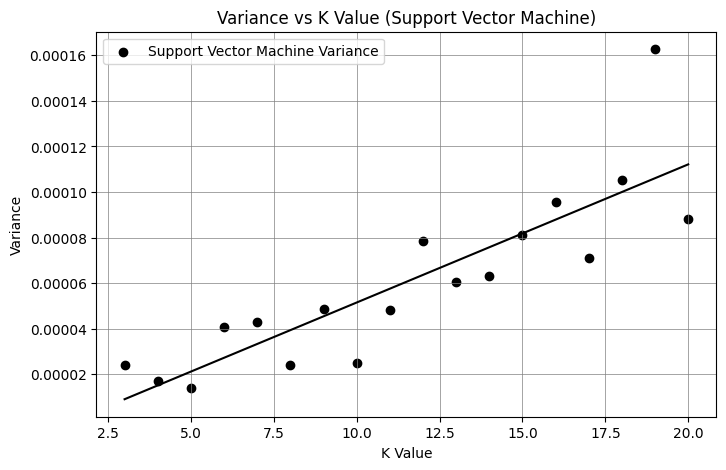

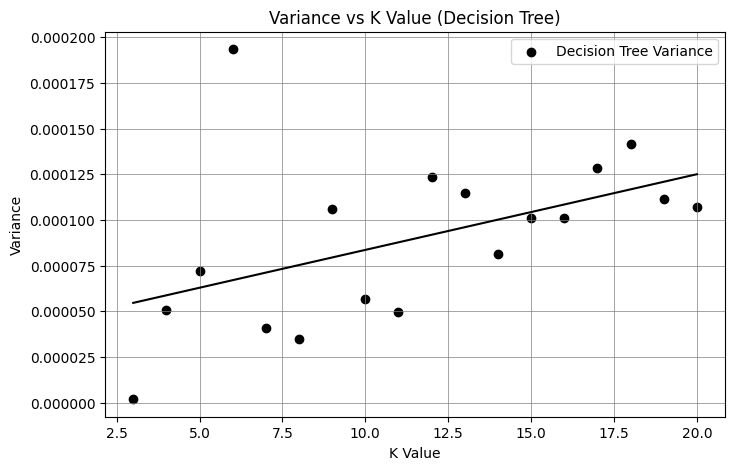

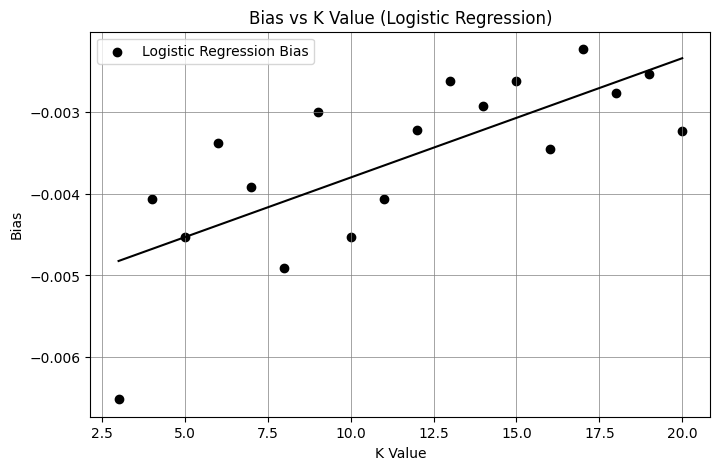

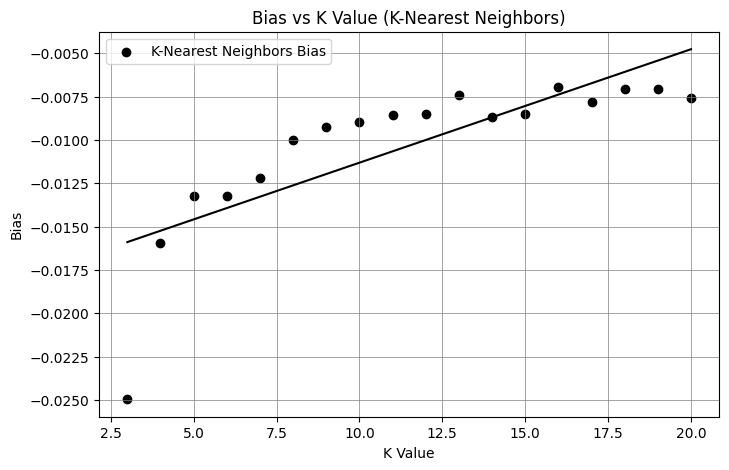

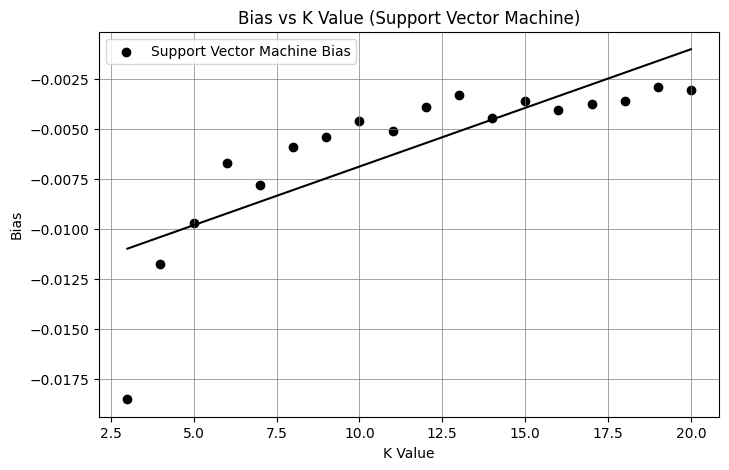

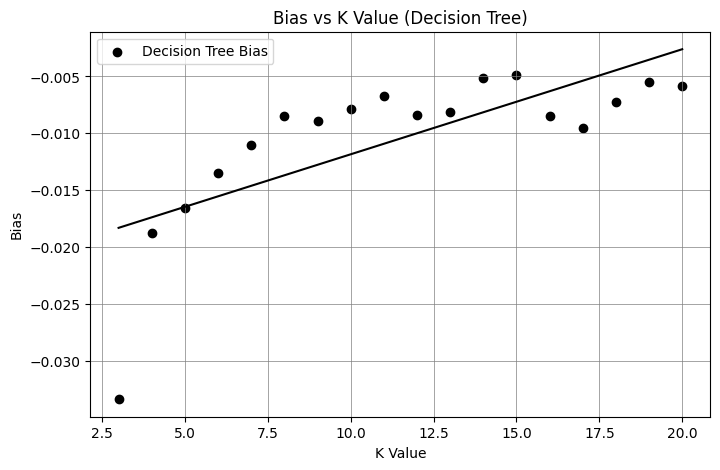

In [22]:
# Generate plots only for Bias and Variance
plot_results(df_results, "Variance", "Variance", "Effect of K on Variance")
plot_results(df_results, "Bias", "Bias", "Effect of K on Bias (Train Accuracy - Test Accuracy)")

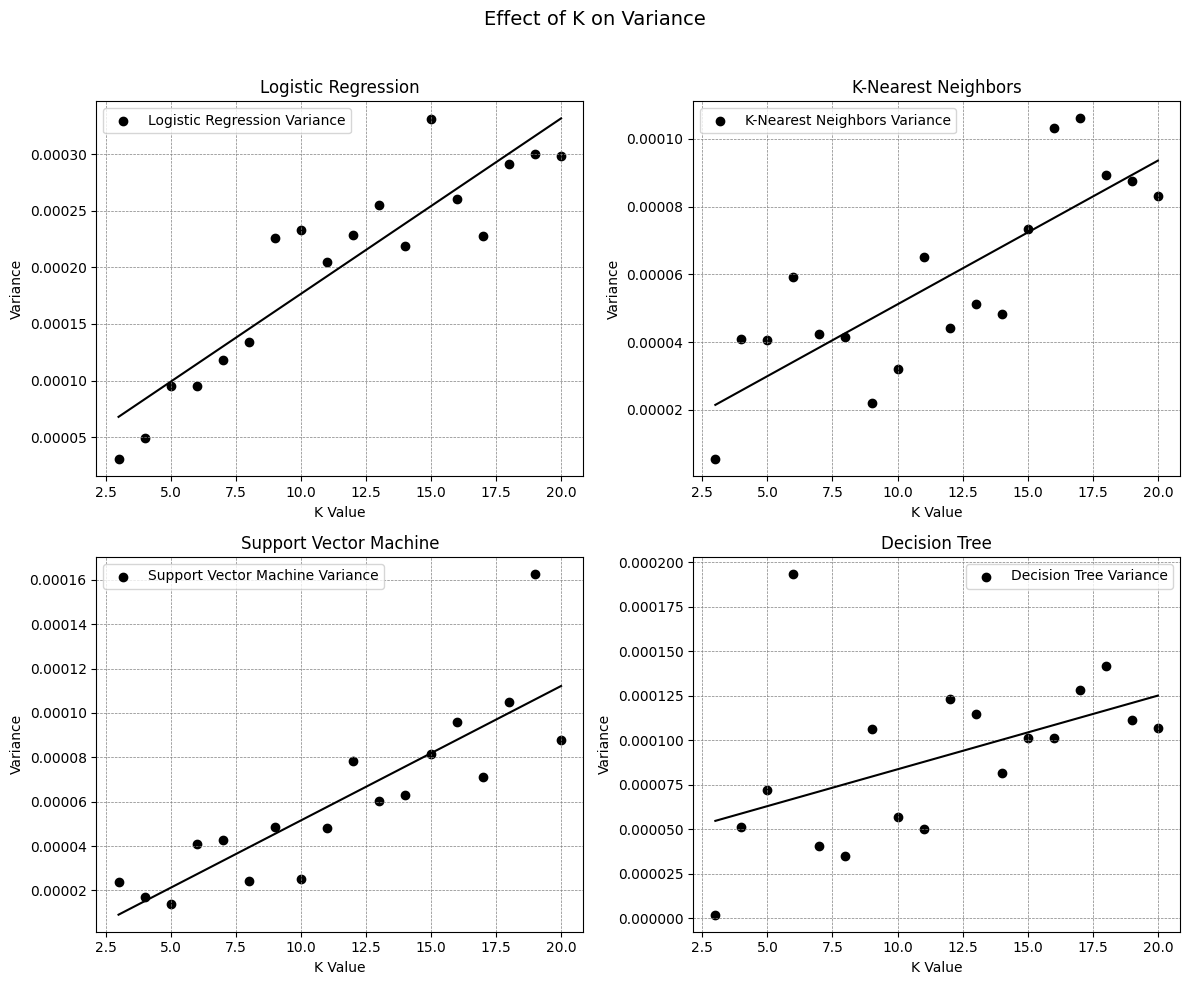

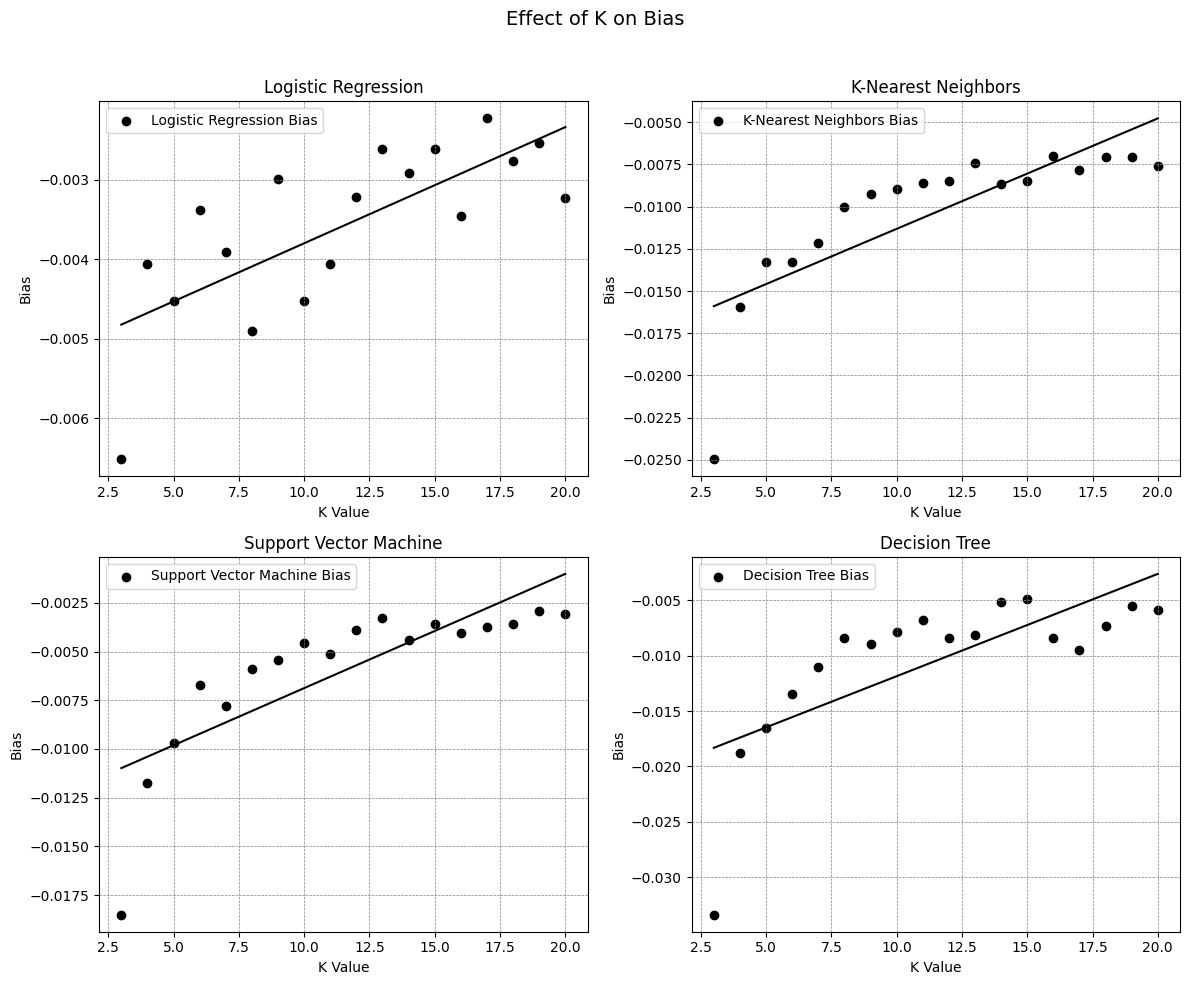

In [23]:
# Function to plot grouped Bias and Variance graphs (4 per image)
def plot_grouped_results(df, metric, ylabel, title_suffix, filename):
    models_list = df["Model"].unique()  # Get unique model names
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create 2x2 subplot grid

    for i, model_name in enumerate(models_list[:4]):  # Limit to 4 models
        ax = axes[i // 2, i % 2]  # Position in 2x2 grid

        # Filter data for a specific model
        model_data = df[df["Model"] == model_name]
        x = model_data["K"].values
        y = model_data[metric].values

        # Scatter plot (Black markers)
        ax.scatter(x, y, color="black", label=f"{model_name} {ylabel}")

        # Fit and plot a straight trend line (Linear regression of degree 1)
        z = np.polyfit(x, y, 1)  # Linear trend line
        p = np.poly1d(z)
        ax.plot(x, p(x), color="black")  # Solid black trend line

        # Labels and title
        ax.set_xlabel("K Value")
        ax.set_ylabel(ylabel)
        ax.set_title(f"{model_name}")

        ax.legend()
        ax.grid(color='gray', linestyle='--', linewidth=0.5)

    # Adjust layout and show plot
    plt.suptitle(title_suffix, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(filename, dpi=300, bbox_inches='tight')  # Save image
    plt.show()

# Generate grouped plots for Bias and Variance (Each containing 4 graphs)
plot_grouped_results(df_results, "Variance", "Variance", "Effect of K on Variance", "variance_graph.png")
plot_grouped_results(df_results, "Bias", "Bias", "Effect of K on Bias", "bias_graphs.png")
